# Lab 6. Natural Language Processing

## Task 6.1 Sentiment Analysis

---


### Problem Descriptions
Perform Sentiment Analysis on the dataset "movie reviews" from the NLTK corpus.



### Implementation and Results
In this dataset, the movie reviews are labelled into 2 categories:  

1.   "pos" for Positive reviews
2.   "neg" for Negative reviews

In the code below, we collect the movie data from 2 labelled reviews and divide the data into training and test set. We then train the Naive Bayes model using word count features and evaluate its performance.

#### Loading the reviews and splitting the dataset
We are using the following libraries in our code:
1. nltk: *to download the "movie reviews" corpus*
2. sklearn: *contains methods for naive bayes, vectorizer, splitting data into training and test sets, and measuring model performance.*
3. matplotlib: *contains methods for plotting graphs*

In [ ]:
#!pip install nltk
import nltk
from nltk.corpus import movie_reviews
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Download movie_reviews dataset locally
nltk.download('movie_reviews')

# Check the categories in movie_reviews
#print(movie_reviews.categories())

# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
 raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
 raw_data.append(movie_reviews.raw(fileids_neg[i]))

# Splitting Data into Training and Test sets
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


#### Implementing solutions using Simple Word Count, TF and TF-IDF features & Evaluating the Performance

In [ ]:
print("Using TF-IDF Vectorisor")
tfidf = TfidfVectorizer(use_idf=True)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)
tfidf_classifier = MultinomialNB().fit(tfidf_data, Y_train)
testing_tfidf = tfidf.transform(X_test)
predictions = tfidf_classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

Using TF-IDF Vectorisor
(1600, 36265)
              precision    recall  f1-score   support

         pos       0.90      0.75      0.82       204
         neg       0.78      0.91      0.84       196

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [ ]:
print("Using TF Vectorisor")
tf = TfidfVectorizer(use_idf=False)
tf_data = tf.fit_transform(X_train)
print(tf_data.shape)
tf_classifier = MultinomialNB().fit(tf_data, Y_train)
testing_tf = tf.transform(X_test)
predictions = tf_classifier.predict(testing_tf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

Using TF Vectorisor
(1600, 36265)
              precision    recall  f1-score   support

         pos       0.97      0.38      0.54       204
         neg       0.60      0.99      0.75       196

    accuracy                           0.68       400
   macro avg       0.79      0.68      0.65       400
weighted avg       0.79      0.68      0.65       400



In [ ]:
print("Using Count Vectorisor")
countvectorizer = CountVectorizer(analyzer='word' , stop_words='english')
count_data = countvectorizer.fit_transform(X_train)
cv_classifier = MultinomialNB().fit(count_data, Y_train)
testing_count_X = countvectorizer.transform(X_test)
predictions = cv_classifier.predict(testing_count_X)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

Using Count Vectorisor
              precision    recall  f1-score   support

         pos       0.81      0.80      0.81       204
         neg       0.80      0.81      0.80       196

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.81      0.81      0.81       400



#### Visualizing the sentiment per sentence

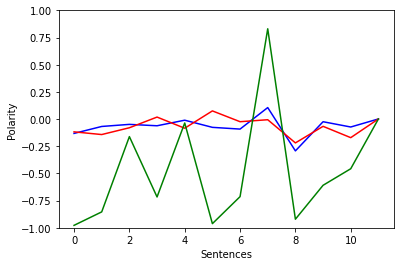

In [ ]:
sentences = X_test[0].split('.')

plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.ylim(-1, 1)
plt.lege

# For testing tfidf performance
tfidf_testing_data = tfidf.transform(sentences) 
tfidf_predictions = tfidf_classifier.predict_proba(tfidf_testing_data) # Returns probability estimates for the test vector (2 sentiments -> 2 probabilities).
polarity = [x[0] - x[1] for x in tfidf_predictions]
plt.plot(polarity, color="blue")

# For testing tf performance
tf_testing_data = tf.transform(sentences) 
tf_predictions = tf_classifier.predict_proba(tf_testing_data) 
polarity = [x[0] - x[1] for x in tf_predictions]
plt.plot(polarity, color="red")


# For testing count vectorizer performance
cv_testing_data = countvectorizer.transform(sentences) 
cv_predictions = cv_classifier.predict_proba(cv_testing_data)
polarity = [x[0]-x[1] for x in cv_predictions]
plt.plot(polarity, color="green")


## Discussions
In this task, we tested the performance and accuracy of our naive bayes model, when using 3 different methods - count vectorizer, term frequency (tf) and term frequency - inverse document frequency (tfidf) methods.<br>
**Everytime we run the code, we get different accuracy in all the 3 models, this is because of the random splitting of movie-reviews dataset into test and train sets.**<br>

**Q1**. Describe how you formulate the problem of sentiment analysis for movie reviews using the simple word count features and naïve Bayes method.<br>
>**Ans**. The problem of sentiment analysis for movie reviews using simple word count features and naive bayes method can be formulated in the following steps:
1.   Collection of movie reviews with labels:
  *   Gather a dataset of movie reviews and label each review as positive, negative, or neutral.
2.   Split the data into training set and testing set:
  *   Divide the dataset into two subsets, a training set and a testing set.
3.   Extract the word count features:
  *   Count the number of positive and negative words in each review and use those counts as features for the classifier. We also calculate the TD and TD-IDF to measure the occurence of a word in a review and the the most relevant reviews relevant to a word.
4.   Build the naïve Bayes classifier from the training set:
  *   Train the classifier on the training set, using the word count features and the review labels as inputs.
5.   Apply the classifier on testing data set:
  *   Use the classifier to predict the sentiment of the reviews in the testing set.
6.   Evaluate the performance:
  *   Calculate the classifier's accuracy, precision, and recall on the testing set to evaluate its performance.

**Q2**. Implement solutions using both the tf and tf-idf features.<br>
>**Ans**. To implement tf and tf-idf in our code, we need to transform the training text data (X_train) into its tf or tf-idf matrix. Once done, we fit the transformed data along with actual fileId to the MultinomialNB classifier to train our model.<br> 
This model could then be validated against the transformed test data. <br>
*Code above in the section "Implementing solutions using Word Count, TF and TF-IDF features & Evaluating the Performance"*<br>

**Q3**. Evaluate the performance and discuss your results.<br>
>**Ans**. The performance can be measured by running classification_report method from metrics library. It gives us the precision, recall, f1-score, support and accuracy.<br>
Based on the performance metrics provided, it appears the Count Vectorisor and TF-IDF Vectorisor are more accurate with accuracy of 81% than the TF Vectorisor with an accuracy of 68%.<br>
However, the recall and precision scores for each class (positive and negative) vary among the three methods. For the positive class, the Count Vectorisor and TF-IDF Vectorisor both have a recall of 80% and a precision of 81%, while the TF Vectorisor has a lower recall of 38% but a higher precision of 97%. For the negative class, the Count Vectorisor and TF-IDF Vectorisor both have a recall of 81% and a precision of 80%, while the TF Vectorisor has a higher recall of 99% but a lower precision of 60%.<br>
Overall, the Count Vectorisor and TF-IDF Vectorisor seem to perform the best, with balanced recall and precision scores for both classes. The TF Vectorisor has lower overall accuracy and imbalanced scores for the positive and negative classes.<br>
The sentiment analysis visualisation also shows us the variance in the probabilities for the given word. The variance is maximum when using countvectorizer.<br>

## Task 6.2 Text Classification

---


### Problem Descriptions
In the previous task, we performed the sentiment analysis by using the classification method into two classes of positive and negative. In this task, we will extend it into a multi-class text classification problem.




### Implementation and Results
In the dataset obtained from fetch_20newsgroups method, we have a collection of 20,000 newsgroup documents divided almost equally in 20 Newsgroups categories.<br>
In our program, we are choosing the following 4 categories for training and testing the classifier model: *'rec.motorcycles', 'talk.religion.misc', 'sci.crypt', 'alt.atheism'*.

In the code below, we collect the training and testing data based on the above categories, and train and evaluate the performance of the Naive Bayes classifier model.

Importing the libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics


Program for generating word count features and implementing Naive Bayes Classifier model

In [2]:
## Splitting the data into training and test set
# Specifying the categories for text
categories = ['rec.motorcycles', 'talk.religion.misc',
              'sci.crypt', 'alt.atheism']
              
training_data = fetch_20newsgroups(subset='train', categories=categories) # Training Data
testing_data = fetch_20newsgroups(subset='test', categories=categories) # Test Data

## Creating a naive bayes classifier model using word count features
# Create the tf-idf transformer
tfidf = TfidfVectorizer(use_idf=True)
# tfidf = TfidfVectorizer(use_idf=False)
training_tfidf = tfidf.fit_transform(training_data.data)
print(training_tfidf.shape)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB().fit(training_tfidf, training_data.target)

## Evaluating performance
testing_tfidf = tfidf.transform(testing_data.data)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(testing_data.target, predictions, target_names=categories))


(2050, 33078)
                    precision    recall  f1-score   support

   rec.motorcycles       0.74      0.92      0.82       319
talk.religion.misc       0.98      0.98      0.98       398
         sci.crypt       0.83      1.00      0.91       396
       alt.atheism       0.97      0.34      0.51       251

          accuracy                           0.86      1364
         macro avg       0.88      0.81      0.80      1364
      weighted avg       0.88      0.86      0.83      1364



Printing the incorrect results (first 5 only)

In [3]:
errors = [i for i in range(len(predictions)) if predictions[i] != testing_data.target[i]]

for i, post_id in enumerate(errors[:5]):
  print("------------------------------------------------------------------")
  print("%s --> %s\n" %(testing_data.target_names[testing_data.target[post_id]], 
                      testing_data.target_names[predictions[post_id]]))
  print(testing_data.data[post_id])


------------------------------------------------------------------
talk.religion.misc --> alt.atheism

From: sandvik@newton.apple.com (Kent Sandvik)
Subject: Re: To Rob Lanphier
Organization: Cookamunga Tourist Bureau
Lines: 43

In article <1993Apr23.181843.20224@organpipe.uug.arizona.edu>,
brian@lpl.arizona.edu (Brian Ceccarelli 602/621-9615) wrote:
> Kent, with regards to the information contained in the Bible (which
> is the original context of this thread), Brian Kendig is inside a huge
> wall.  Brian *IS* inside.  The Bible and the information contained therein
> are outside the wall.   Brian Kendig proves this very sad fact by the
> absurd things he says.  For example, "If I get through into the firey
> pit, I will cease to exist."  The Bible doesn't say that.  He hasn't
> a clue even to what Jesus said about hell.  That is but one example.

Looking at your discussion I would say that you both operate
from your own reference frame. There's no inside and no outside,
there are just

## Discussions

In this task, we implemented the naive bayes classifier model using term frequency - inverse document frequency (tfidf) features.<br>

**Q1**. Describe how you formulate the problem of text classification using the word count vectors and naïve Bayes method.<br>
>**Ans**. The problem of text classification using word count features and naive bayes method can be formulated in the following steps:
1.   Collection of texts with class labels:
  *   Gather a collection of texts, labeled with their corresponding class.
2.   Split the data into training set and testing set:
  *   Divide the dataset into two subsets, a training set (used to train the model) and a testing set (used to evaluate the model).
3.   Extract the word count features:
  *   Use word counts as features, by counting the number of times each word appears in a text and generating Term Frequency and Inverse Document Frequency from these counts. 
4.   Build the naïve Bayes classifier from the training set:
  *   Train the classifier on the training set, using the word count features and the review labels as inputs.
5.   Apply the classifier on testing data set:
  *   Use the classifier to predict the class of each text in the testing set and comparing the predicted class to the actual class.
6.   Evaluate the performance:
  *   Calculate the classifier's accuracy, precision, and recall on the testing set to evaluate its performance.

**Q2**. Complete the program with your own choice of news groups from the dataset.<br>
>**Ans**. The completed solution is implemented in the above code. The 4 categories we have selected are 'rec.motorcycles', 'talk.religion.misc', 'sci.crypt', 'alt.atheism'.<br>

**Q3**. Evaluate the performance and discuss your results.<br>
>**Ans**. The performance can be measured by running classification_report method from metrics library. It gives us the precision, recall, f1-score, support and accuracy.<br>
Based on the performance metrics provided, the model seems to be very accurate with accuracy of 0.86 and a macro average f1-score of 0.80, indicating that it performs well overall. <br> 
The model performed well in predicting the rec.motorcycles category with a precision of 74%, recall of 92%, and f1-score of 82%. It also performed well in predicting the talk.religion.misc category with a precision of 98%, recall of 98%, and f1-score of 98%. Additionally, it performed well in predicting the sci.crypt category with a precision of 83%, recall of 100%, and f1-score of 91%. <br>However, the model's performance is not as strong in predicting the alt.atheism category, with a precision of 97%, recall of 34%, and f1-score of 51%.<br>
Overall, the model had a macro average f1-score of 80% and a weighted average f1-score of 83%.

## Task 6.3 Topic Modelling

---

### Problem Descriptions
Topic modelling aims to discover the hidden semantic structures of a large text corpus, with numerous applications such as automatic categorisation of documents, text mining, text information retrieval, to name a few.



### Implementation and Results
In the dataset obtained from fetch_20newsgroups method, we have a collection of 20,000 newsgroup documents divided almost equally in 20 Newsgroups categories.<br>
In our program, we are choosing the following 4 categories for training and testing the classifier model: *'rec.motorcycles', 'talk.religion.misc', 'sci.crypt', 'alt.atheism'*.

In the code below, we collect the training and testing data based on the above categories, and train and evaluate the performance of the Naive Bayes classifier model.

Importing the libraries

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import models, corpora

Building a corpus of documents

In [ ]:
# Random Texts from answers found on quora and twitter
documents = [
  """
  Guitars are amazing for many reasons. Firstly, 
  they are incredibly versatile instruments 
  that can be used to play a wide variety of music 
  styles. From rock and roll to blues to jazz to pop, 
  guitars are the perfect instrument to create any type 
  of music. Secondly, guitars are portable and easy to 
  carry around, making them the perfect instrument to 
  play on the go. Thirdly, guitars have a rich history 
  and are steeped in tradition, making them an important 
  part of music culture. Lastly, guitars are incredibly 
  fun to play and can provide endless hours of enjoyment 
  for players of all skill levels. Whether you are a 
  beginner or an experienced player, guitars are a joy 
  to play and will bring endless joy and entertainment 
  to your life.
  """,
  """
  Being a grill chef in a high-paced environment can be 
  very demanding and stressful. Grill chefs often work 
  long hours, and the job requires physical stamina and 
  the ability to work under pressure. They must be able 
  to multitask and work efficiently to keep up with orders 
  and ensure that the food is cooked to the proper 
  specifications. Grill chefs may also be responsible for 
  maintaining cleanliness and organization in the kitchen, 
  as well as keeping track of inventory and ordering supplies 
  as needed. Despite the challenges, many grill chefs find the 
  fast-paced nature of the job to be exhilarating and enjoy 
  the sense of accomplishment that comes with successfully 
  serving a large number of customers.
  """
]

Data Cleaning

In [ ]:
# Clean the data by using stemming and stopwords removal
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')
texts = [
  [stemmer.stem(word) for word in document.lower().split() if word not in stop_words]
  for document in documents
  ]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Building a LDA model

In [ ]:
# Create a dictionary from the words
dictionary = corpora.Dictionary(texts)

# Create a document-term matrix
doc_term_mat = [dictionary.doc2bow(text) for text in texts]

# Generate the LDA model 
num_topics = 2
ldamodel = models.ldamodel.LdaModel(doc_term_mat, 
        num_topics=num_topics, id2word=dictionary, passes=25)

Analysing the topics and their supporting words

In [ ]:
num_words = 5
for i in range(num_topics):
  print(ldamodel.print_topic(i, topn=num_words))

print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for item in ldamodel.print_topics(num_topics=num_topics, num_words=num_words):
    print('\nTopic', item[0])
    list_of_strings = item[1].split(' + ')
    for text in list_of_strings:
        details = text.split('*')
        print("%-12s:%0.2f%%" %(details[1], 100*float(details[0])))

0.052*"guitar" + 0.036*"play" + 0.028*"instrument" + 0.020*"music" + 0.020*"joy"
0.037*"chef" + 0.037*"grill" + 0.029*"work" + 0.021*"order" + 0.021*"keep"

Top 5 contributing words to each topic:

Topic 0
"guitar"    :5.20%
"play"      :3.60%
"instrument":2.80%
"music"     :2.00%
"joy"       :2.00%

Topic 1
"chef"      :3.70%
"grill"     :3.70%
"work"      :2.90%
"order"     :2.10%
"keep"      :2.10%


Evaluting the LDA model on new documents

In [ ]:
new_docs = [
  """
  As the grill chef at the local restaurant, 
  Jake was used to the fast-paced environment 
  of the kitchen. However, when he wasn't 
  flipping burgers and tending to the sizzling 
  grill, he could often be found strumming his 
  guitar in the back storage room. Music was Jake's 
  true passion, and he loved nothing more than the 
  sound of his guitar echoing through the empty room 
  as he practiced for his next gig. Despite the long 
  hours and hectic schedule of being a grill chef, 
  Jake never let his love for music take a back seat 
  and was always finding ways to incorporate it into 
  his daily routine.
  """,
  """
  Jake was a man who loved two things: music and the 
  sound of his guitar echoing through an empty room. 
  Despite his busy schedule, he always made time to 
  practice for his next gig. When he wasn't working, 
  he could often be found strumming away in the back 
  storage room, letting the music flow through him 
  and transport him to a different place. Jake never 
  let his love for music take a back seat and was 
  always finding ways to incorporate it into his 
  daily routine.
  """,
  """
  As the grill chef at the local restaurant, Jake 
  was used to the fast-paced environment of the kitchen. 
  Despite the long hours and hectic schedule of being a 
  grill chef, Jake was always able to keep up with the 
  demand, flipping burgers and tending to the sizzling 
  grill with ease. Maintaining cleanliness and organization 
  in the kitchen was also a top priority for Jake, as he 
  knew that the success of the restaurant depended on it. 
  In his free time, Jake enjoyed trying out new recipes 
  and experimenting with different ingredients on the grill. 
  He was always striving to improve his skills and provide 
  the best possible dining experience for his customers.
  """,
  
]

# Stemming and data cleaning
new_texts = [
  [stemmer.stem(word) for word in document.lower().split() if word not in stop_words]
  for document in new_docs
  ]
new_doc_term_mat = [dictionary.doc2bow(text) for text in new_texts]

# Run model on newer texts
vector = ldamodel[new_doc_term_mat]
for i, x in enumerate(vector):
  for topic, prob in x:
    print(f"the probability of text {i} being in topic {topic} is {prob}")
  # Select topic with higher probabilities
  selected_topic = "Topic 1" if x[1][1] > x[0][1] else "Topic 0"
  print(f"Text {i} is hence classified to {selected_topic} \n")
  

the probability of text 0 being in topic 0 is 0.4000437259674072
the probability of text 0 being in topic 1 is 0.5999562740325928
Text 0 is hence classified to Topic 1 

the probability of text 1 being in topic 0 is 0.6128295063972473
the probability of text 1 being in topic 1 is 0.3871705234050751
Text 1 is hence classified to Topic 0 

the probability of text 2 being in topic 0 is 0.11113317310810089
the probability of text 2 being in topic 1 is 0.8888668417930603
Text 2 is hence classified to Topic 1 



## Discussions

In this task, we implemented Topic classification using LDA model and the document term matrix. <br>

**Q1**. Find a few documents on some topics you are interested in. Following the above example, build a LDA model from these documents.<br>
>**Ans**. We built the new corpus of documents from answers found on quora regarding the topics of 'guitar' and 'grill chef'. These are two entirely different topics and should have little to no words in common.<br> The completed solution for topic classification using LDA is implemented above.

**Q2**. Display the topics from the LDA model and their supporting words. Check if they look like expected.<br>
>**Ans**. The code displays the 2 topic and their supporting words. Since the topics are so different, there are no common top 5 words between them. <br> The code shows the following topics and their supporting words:<br>
```
Top 5 contributing words to each topic:
  Topic 0
    "guitar"    :5.20%
    "play"      :3.60%
    "instrument":2.80%
    "music"     :2.00%
    "joy"       :2.00%
  Topic 1
    "chef"      :3.70%
    "grill"     :3.70%
    "work"      :2.90%
    "order"     :2.10%
    "keep"      :2.10%
```

**Q3**. Get another new document, ideally containing one or more of these topics, and compute its projection vector from the LDA model. Discuss your results.<br>
>**Ans**. We have 3 versions of the same text for evaluation, with each containing different distributions of the 2 topics as Text 0 (containing text about guitar and grill chef), Text 1 (containing text mostly relating to guitar) and Text 2 (containing text mostly related to grill chef). When running the code, the code provides near-exact distribution of the topic, slightly varying due to the common words in both. <br>
The output of the code:
```
the probability of text 0 being in topic 0 is 0.4000437259674072
the probability of text 0 being in topic 1 is 0.5999562740325928
Text 0 is hence classified to Topic 1
the probability of text 1 being in topic 0 is 0.6128295063972473
the probability of text 1 being in topic 1 is 0.3871705234050751
Text 1 is hence classified to Topic 0 
the probability of text 2 being in topic 0 is 0.11113317310810089
the probability of text 2 being in topic 1 is 0.8888668417930603
Text 2 is hence classified to Topic 1 
```

